# Grafos em looping

É ideal para problemas onde estamos querendo que seja iterado até uma certa condição seja satisfeita

Aqui vamos criar um fluxo onde ele irá verificar se um contador atingiu o número 5 e depois irá seguir para o restante do fluxo

### Criando estado do grafo

In [36]:
from typing import TypedDict, List

class State(TypedDict):
	nome: str
	contador: int
	lista_numero_aleatorios: List[int]

### Criando nós

In [37]:
def cumprimento_node(state: State) -> State:
	nome = state["nome"]
	print(f"Olá {nome}. Iremos iniciar a contagem.")
	return {}

In [38]:
import random

def random_numbers(state: State) -> State:
	# Inserindo novo elemento na lista
	lista = state["lista_numero_aleatorios"]
	num_aleatorio = random.randint(1, 10)
	lista.append(num_aleatorio)

	# Inserindo +1 para o contador
	contador = state["contador"] + 1

	print(f"Contador em: {contador}")
	print(f"Lista: {lista}")

	return {
		"lista_numero_aleatorios": lista,
		"contador": contador
	}

### Criando condicional

In [39]:
from typing import Literal

def deve_continuar(state: State) -> Literal["random_numbers_again", "end"]:
	if state["contador"] < 5:
		return "random_numbers_again"
	return "end"

### Criando estruturas de nós

In [40]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(State)

In [41]:
from langgraph.graph import END, START

graph_builder.add_node("cumprimento_node", cumprimento_node)
graph_builder.add_node("random_numbers_node", random_numbers)

graph_builder.add_conditional_edges(
    "random_numbers_node",
    deve_continuar,
    {
        "random_numbers_again": "random_numbers_node",
        "end": END
    }
)


graph_builder.add_edge(START, "cumprimento_node")
graph_builder.add_edge("cumprimento_node", "random_numbers_node")

In [42]:
graph_compiled = graph_builder.compile()

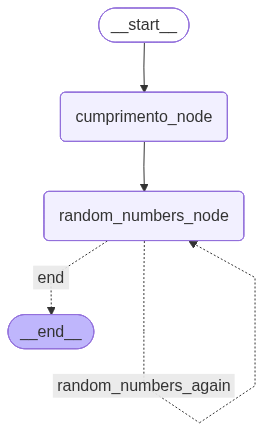

In [43]:
from IPython.display import display, Image

display(Image(graph_compiled.get_graph().draw_mermaid_png()))

# Rodando o grafo

In [44]:
state = {
	"nome": "Natália",
	"contador": 0,
	"lista_numero_aleatorios": []
}

In [45]:
resp = graph_compiled.invoke(state)

Olá Natália. Iremos iniciar a contagem.
Contador em: 1
Lista: [4]
Contador em: 2
Lista: [4, 6]
Contador em: 3
Lista: [4, 6, 4]
Contador em: 4
Lista: [4, 6, 4, 5]
Contador em: 5
Lista: [4, 6, 4, 5, 3]


In [46]:
resp

{'nome': 'Natália', 'contador': 5, 'lista_numero_aleatorios': [4, 6, 4, 5, 3]}